/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_11065/1915084662.py:3: DtypeWarning: Columns (8,10,21,27,28,29,35,38,40,48,51,54,55,56,61,63,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('duke_presentation_interactions.csv')
/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_11065/1915084662.py:10: UserWarning: Parsing dates in %d-%m-%Y, %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['timestamp'] = pd.to_datetime(df['Createdat'])


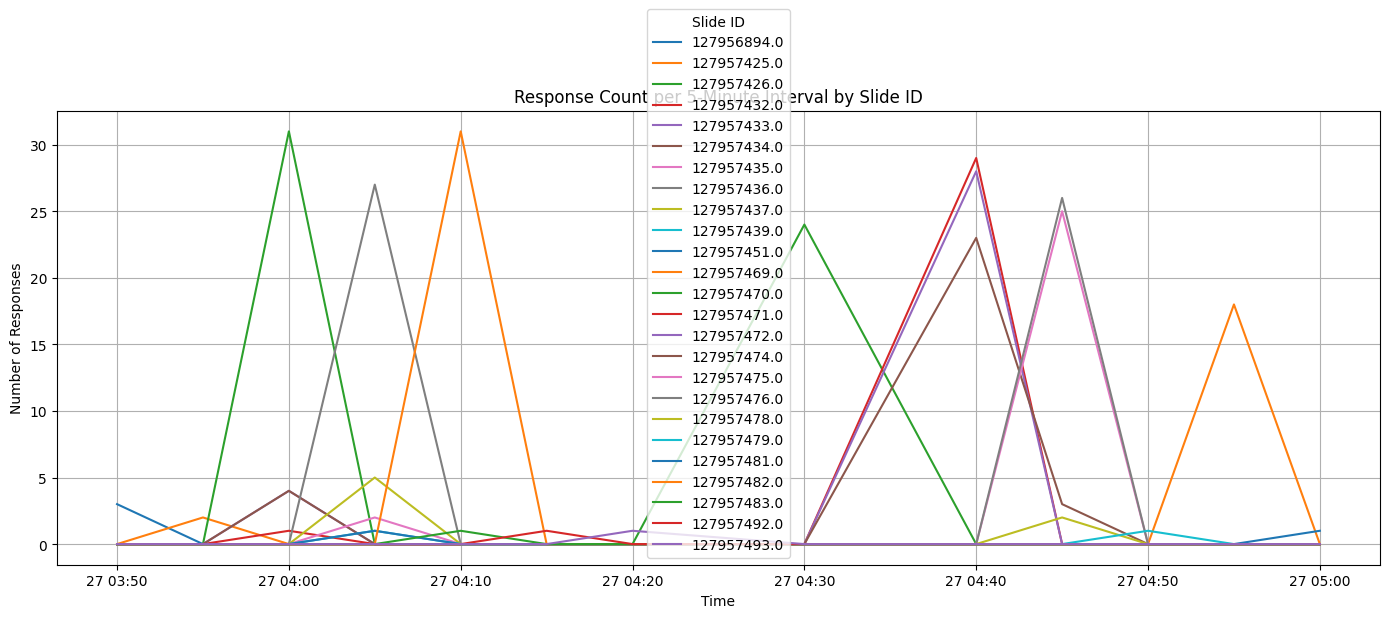

In [12]:
import pandas as pd

df = pd.read_csv('duke_presentation_interactions.csv')
# df.groupby('Presentationid').size().sort_values(ascending=False)
cols = ['ID', 'Presentationid', 'Interaction Source', 'Numberofreactions', 'Reactiontype',
       'Slideid', 'Audienceid', 'Createdat', 'Updatedat', 'Slideoptions', 'Slidetitle', 'Slide Description', 'Title', 'Slideorder', 'Slidetypenormalized', 'Vote']
df = df[df['Presentationid'] == 7021758][cols].sort_values(by='Slideorder').copy()
import matplotlib.pyplot as plt
# Set datetime as index (optional but useful for time-based operations)
df['timestamp'] = pd.to_datetime(df['Createdat'])
df = df.sort_values('timestamp')

df = df[df['timestamp'] < pd.Timestamp('2025-06-27 06:00:00')]
# Round timestamps to 5-minute bins
df['time_bin'] = df['timestamp'].dt.floor('5min')

# Group by slide_id and 5-minute time_bin
grouped = df.groupby(['time_bin', 'Slideid']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 6))
for slide_id in grouped.columns:
    plt.plot(grouped.index, grouped[slide_id], label=slide_id)

plt.title('Response Count per 5-Minute Interval by Slide ID')
plt.xlabel('Time')
plt.ylabel('Number of Responses')
plt.legend(title='Slide ID')
plt.grid(True)
plt.tight_layout()
plt.show()

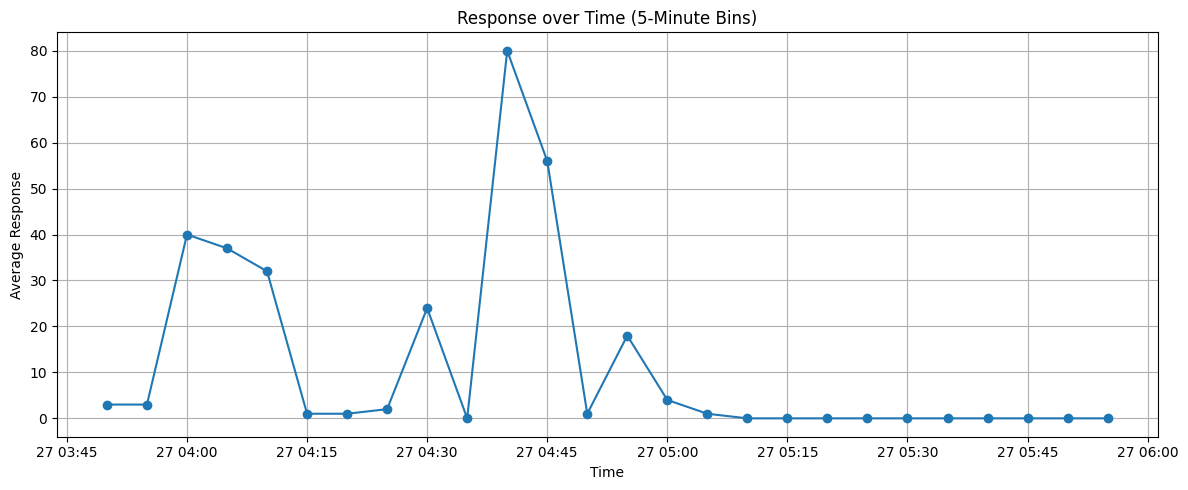

In [71]:

# Plot
plt.figure(figsize=(12, 5))
series = binned[binned.index < pd.Timestamp('2025-06-27 06:00:00')]
plt.plot(series.index, series, marker='o', linestyle='-')
plt.title('Response over Time (5-Minute Bins)')
plt.xlabel('Time')
plt.ylabel('Average Response')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
import json

# df.groupby('Slideid').size()
# df[df['Slidetypenormalized'] == 'Poll']
df = pd.read_csv('duke_presentation_interactions.csv')
def extract_poll_value(slide_title, slide_options, poll_vote):
    if poll_vote is None or type(slide_options) != str:
        return None
    else:
        data = json.loads(slide_options)
        for option in data:
            if option['id'] == poll_vote:
                return f'Answered: `{option["title"]}` for "{slide_title}"'

def extract_short_answer(slide_title, short_answer):
    if short_answer is None or short_answer == 'nan' or type(short_answer) != str:
        return None
    else:
        return f'Answered: `{short_answer}` for "{slide_title}"'

df['Chosen Poll'] = df.apply(lambda x: extract_poll_value(x['Slidetitle'], x['Slideoptions'], x['Poll Vote']), axis=1)
# df[df['Slidetypenormalized'] == 'Poll'][['Chosen Poll', 'Slideoptions', 'Poll Vote']]
df = df[df['Slidetypenormalized'] == 'Short Answer'][['Slideid', 'Slideorder', 'Slidetitle', 'Slidetypenormalized', 'Title']]
df['Chosen Short Answer'] = df.apply(lambda x: extract_short_answer(x['Slidetitle'], x['Title']), axis=1)

df
# df[df['Slidetypenormalized'] == 'Short Answer'][['Slideid', 'Slideorder', 'Slidetitle', 'Slidetypenormalized', 'Title', 'Chosen Short Answer']]
# chosen_answers = df[~df['Chosen Short Answer'].isin(['nan'])]['Chosen Short Answer'].unique()
# chosen_answers

/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_11065/748092051.py:5: DtypeWarning: Columns (8,10,21,27,28,29,35,38,40,48,51,54,55,56,61,63,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('duke_presentation_interactions.csv')


,Slideid,Slideorder,Slidetitle,Slidetypenormalized,Title,Chosen Short Answer
3703,123243123.0,5.00,Whose birthday is in 21/03,Short Answer,NaN,None
3706,123243123.0,5.00,Whose birthday is in 21/03,Short Answer,NaN,None
3709,123243123.0,5.00,Whose birthday is in 21/03,Short Answer,NaN,None
3712,123243123.0,5.00,Whose birthday is in 21/03,Short Answer,NaN,None
3715,123243123.0,5.00,Whose birthday is in 21/03,Short Answer,Mina,"Answered: `Mina` for ""Whose birthday is in 21/03"""
...,...,...,...,...,...,...
8234,126636732.0,44.83,This old bot's first-contact resolution rate is:,Short Answer,NaN,None
8236,126636732.0,44.83,This old bot's first-contact resolution rate is:,Short Answer,65,"Answered: `65` for ""This old bot's first-conta..."
8238,126636732.0,44.83,This old bot's first-contact resolution rate is:,Short Answer,45,"Answered: `45` for ""This old bot's first-conta..."
8240,126636732.0,44.83,This old bot's first-contact resolution rate is:,Short Answer,NaN,None


In [12]:
columns = ['ID', 'Source ID', 'Interaction Source', 'Presentationid', 'Slideid',
       'Audienceid', 'Teamid', 'Title',  'Audienceunique',
       'Streak', 'Laststreak', 'Longeststreak', 'Streakbonuspoint',
       'Quiztimestamp', 'Ispartiallycorrect', 'Votescount',
       'Numberofreactions', 'Reactiontype', 'Rating', 'Pinned', 'Answered',
       'Status', 'Isprivate', 'Deleted', 'Createdat', 'Updatedat', 'Vote',
       'Poll Vote', 'Pairs', 'Scale ID', 'Scale Value',
       'Matchingquestionanswer', 'Reason', 'Image', 'Answeredtimestamp',
       'Presentation Name', 'Userid', 'Teamplay', 'Teamscoringrule',
       'Audience Name', 'Audience Email', 'Audience Organisation',
       'Audience Emoji', 'Audience Color', 'Isanonymous',
       'Audience Created At', 'Audience Updated At', 'Team Name', 'Team Color',
       'Team Visible', 'Slideorder', 'Slidetypenormalized', 'Slidetitle',
       'Openendedmultipleoption', 'Hastimelimit', 'Timetoanswer', 'Slideimage',
       'Audiolink', 'Othercorrectquiz', 'Matchingquestionoptions',
       'Correctquiztypeanswer', 'Slideoptions', 'Scalesconfiguration',
       'Slide Description', 'Slide Created At', 'Slide Updated At']

df[df['Presentationid'] == 5822909][columns].to_csv('sample_presentation_data.csv')

In [ ]:
df = pd.read_csv('duke_presentation_interactions.csv')
df[df['Presentationid'].isin([6925119])]['Presentation Name']
# df['Presentationid'].unique()

/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_11065/156911434.py:1: DtypeWarning: Columns (8,10,21,27,28,29,35,38,40,48,51,54,55,56,61,63,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('duke_presentation_interactions.csv')


8058                                        Best weekday?
8059    Do you think Gen AI will replace softwares soon? 
8060                                        Best weekday?
8061    Do you think Gen AI will replace softwares soon? 
8062    The rate of inquiries resolved by updated bot is:
                              ...                        
8272               Something new you've tried this month?
8273               Something new you've tried this month?
8278                            Sum up your May in 1 word
8279                            Sum up your May in 1 word
8280               Something new you've tried this month?
Name: Slidetitle, Length: 219, dtype: object

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

def analyze_audience_text_submissions(df):
    """
    Comprehensive analysis of audience text submissions from AhaSlides data
    """
    print("📝 ANALYZING AUDIENCE TEXT SUBMISSIONS FOR CHAU")
    print("="*60)

    # Load data
    print("🔍 Examining available text data...")

    # Identify text-containing columns
    text_columns = []
    potential_text_cols = [
        'Openendedmultipleoption', 'Slideoptions', 'Vote',
        'Answered', 'Image', 'Reason', 'Slidetitle'
    ]

    for col in potential_text_cols:
        if col in df.columns:
            # Check if column contains meaningful text
            text_count = df[col].dropna().astype(str).str.len().sum()
            if text_count > 0:
                text_columns.append(col)
                print(f"   ✅ Found text in '{col}': {df[col].dropna().count()} responses")

    if not text_columns:
        print("   ⚠️ No significant text submissions found in standard columns")
        # Look for any columns with string data
        for col in df.columns:
            if df[col].dtype == 'object' and df[col].dropna().count() > 0:
                sample_text = str(df[col].dropna().iloc[0]) if len(df[col].dropna()) > 0 else ""
                if len(sample_text) > 3 and sample_text not in ['True', 'False', 'nan']:
                    text_columns.append(col)
                    print(f"   📝 Alternative text source found: '{col}'")

    return text_columns

def extract_and_clean_text(df, text_columns):
    """
    Extract and clean all text submissions
    """
    all_text = []
    text_metadata = []

    for col in text_columns:
        for idx, text in df[col].dropna().items():
            if pd.notna(text) and str(text).strip() and str(text) not in ['nan', '', 'None']:
                cleaned_text = str(text).strip()
                all_text.append(cleaned_text)
                text_metadata.append({
                    'text': cleaned_text,
                    'source_column': col,
                    'row_index': idx,
                    'slide_order': df.loc[idx, 'Slideorder'] if 'Slideorder' in df.columns else idx,
                    'slide_title': df.loc[idx, 'Slidetitle'] if 'Slidetitle' in df.columns else 'Unknown',
                    'word_count': len(cleaned_text.split()),
                    'char_count': len(cleaned_text)
                })

    return all_text, text_metadata

def analyze_text_quality(text_metadata):
    """
    Analyze the quality and characteristics of text submissions
    """
    if not text_metadata:
        return {}

    df_text = pd.DataFrame(text_metadata)

    analysis = {
        'total_submissions': len(df_text),
        'avg_word_count': df_text['word_count'].mean(),
        'avg_char_count': df_text['char_count'].mean(),
        'longest_response': df_text.loc[df_text['char_count'].idxmax()] if len(df_text) > 0 else None,
        'shortest_response': df_text.loc[df_text['char_count'].idxmin()] if len(df_text) > 0 else None,
        'responses_by_source': df_text['source_column'].value_counts().to_dict(),
        'word_count_distribution': df_text['word_count'].describe(),
        'engagement_by_slide': df_text.groupby('slide_title').size().to_dict()
    }

    return analysis

def perform_content_analysis(all_text):
    """
    Analyze content themes, sentiment, and patterns
    """
    if not all_text:
        return {}

    # Combine all text for analysis
    combined_text = ' '.join(all_text).lower()

    # Word frequency analysis
    words = re.findall(r'\b\w+\b', combined_text)
    word_freq = Counter(words)

    # Remove common stop words
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'this', 'that', 'these', 'those'}

    meaningful_words = {word: count for word, count in word_freq.items()
                       if word not in stop_words and len(word) > 2}

    # Analyze response patterns
    patterns = {
        'questions_asked': len([text for text in all_text if '?' in text]),
        'exclamations': len([text for text in all_text if '!' in text]),
        'single_word_responses': len([text for text in all_text if len(text.split()) == 1]),
        'detailed_responses': len([text for text in all_text if len(text.split()) > 10]),
        'contains_numbers': len([text for text in all_text if re.search(r'\d', text)]),
        'all_caps_responses': len([text for text in all_text if text.isupper() and len(text) > 3])
    }

    # Sentiment indicators (simple approach)
    positive_words = ['good', 'great', 'excellent', 'amazing', 'love', 'like', 'yes', 'agree', 'positive', 'happy', 'excited', 'awesome', 'fantastic', 'wonderful']
    negative_words = ['bad', 'terrible', 'awful', 'hate', 'dislike', 'no', 'disagree', 'negative', 'sad', 'frustrated', 'boring', 'difficult', 'confusing']

    sentiment = {
        'positive_indicators': sum(combined_text.count(word) for word in positive_words),
        'negative_indicators': sum(combined_text.count(word) for word in negative_words),
        'neutral_responses': len(all_text) - len([text for text in all_text if any(word in text.lower() for word in positive_words + negative_words)])
    }

    return {
        'word_frequency': dict(meaningful_words.most_common(20)),
        'response_patterns': patterns,
        'sentiment_analysis': sentiment,
        'total_unique_words': len(meaningful_words),
        'vocabulary_richness': len(meaningful_words) / len(words) if words else 0
    }

def create_text_visualizations(df, text_metadata, content_analysis):
    """
    Create comprehensive visualizations for text analysis
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('📝 Chau\'s Presentation: Audience Text Analysis', fontsize=16, fontweight='bold')

    # 1. Response Length Distribution
    ax1 = axes[0, 0]
    if text_metadata:
        df_text = pd.DataFrame(text_metadata)
        word_counts = df_text['word_count']

        ax1.hist(word_counts, bins=min(10, len(word_counts)), alpha=0.7, color='skyblue', edgecolor='black')
        ax1.set_title('📊 Response Length Distribution', fontweight='bold')
        ax1.set_xlabel('Word Count')
        ax1.set_ylabel('Number of Responses')
        ax1.axvline(word_counts.mean(), color='red', linestyle='--', label=f'Average: {word_counts.mean():.1f}')
        ax1.legend()
    else:
        ax1.text(0.5, 0.5, 'No text data available', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('📊 Response Length (No Data)')

    # 2. Top Words
    ax2 = axes[0, 1]
    if content_analysis and 'word_frequency' in content_analysis:
        top_words = list(content_analysis['word_frequency'].items())[:10]
        if top_words:
            words, counts = zip(*top_words)
            bars = ax2.barh(range(len(words)), counts, color='lightcoral', alpha=0.7)
            ax2.set_yticks(range(len(words)))
            ax2.set_yticklabels(words)
            ax2.set_title('🔤 Most Frequent Words', fontweight='bold')
            ax2.set_xlabel('Frequency')

            # Add count labels
            for bar, count in zip(bars, counts):
                width = bar.get_width()
                ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                        str(count), ha='left', va='center', fontweight='bold')
    else:
        ax2.text(0.5, 0.5, 'Insufficient text for word analysis', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('🔤 Word Frequency (No Data)')

    # 3. Response Patterns
    ax3 = axes[0, 2]
    if content_analysis and 'response_patterns' in content_analysis:
        patterns = content_analysis['response_patterns']
        # Only show patterns with non-zero values
        non_zero_patterns = {k: v for k, v in patterns.items() if v > 0}

        if non_zero_patterns:
            pattern_names = list(non_zero_patterns.keys())
            pattern_values = list(non_zero_patterns.values())

            colors = plt.cm.Set3(np.linspace(0, 1, len(pattern_names)))
            wedges, texts, autotexts = ax3.pie(pattern_values, labels=pattern_names, autopct='%1.1f%%',
                                              colors=colors, startangle=90)
            ax3.set_title('🎯 Response Patterns', fontweight='bold')

            # Make text more readable
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(8)
        else:
            ax3.text(0.5, 0.5, 'No significant patterns detected', ha='center', va='center', transform=ax3.transAxes)
            ax3.set_title('🎯 Response Patterns (No Data)')
    else:
        ax3.text(0.5, 0.5, 'No pattern data available', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('🎯 Response Patterns (No Data)')

    # 4. Engagement by Slide
    ax4 = axes[1, 0]
    if text_metadata:
        df_text = pd.DataFrame(text_metadata)
        slide_engagement = df_text['slide_title'].value_counts().head(8)

        if len(slide_engagement) > 0:
            bars = ax4.bar(range(len(slide_engagement)), slide_engagement.values,
                          color='gold', alpha=0.7)
            ax4.set_title('📈 Text Responses by Slide', fontweight='bold')
            ax4.set_xlabel('Slide')
            ax4.set_ylabel('Number of Text Responses')
            ax4.set_xticks(range(len(slide_engagement)))
            ax4.set_xticklabels([title[:15] + '...' if len(title) > 15 else title
                               for title in slide_engagement.index], rotation=45)

            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    else:
        ax4.text(0.5, 0.5, 'No slide engagement data', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('📈 Slide Engagement (No Data)')

    # 5. Sentiment Analysis
    ax5 = axes[1, 1]
    if content_analysis and 'sentiment_analysis' in content_analysis:
        sentiment = content_analysis['sentiment_analysis']
        categories = ['Positive', 'Negative', 'Neutral']
        values = [sentiment['positive_indicators'], sentiment['negative_indicators'], sentiment['neutral_responses']]
        colors = ['green', 'red', 'gray']

        bars = ax5.bar(categories, values, color=colors, alpha=0.7)
        ax5.set_title('😊 Sentiment Analysis', fontweight='bold')
        ax5.set_ylabel('Number of Indicators/Responses')

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    else:
        ax5.text(0.5, 0.5, 'No sentiment data available', ha='center', va='center', transform=ax5.transAxes)
        ax5.set_title('😊 Sentiment Analysis (No Data)')

    # 6. Response Quality Metrics
    ax6 = axes[1, 2]
    if text_metadata:
        df_text = pd.DataFrame(text_metadata)

        # Create quality categories
        quality_categories = []
        for _, row in df_text.iterrows():
            if row['word_count'] >= 10:
                quality_categories.append('Detailed')
            elif row['word_count'] >= 3:
                quality_categories.append('Moderate')
            else:
                quality_categories.append('Brief')

        quality_counts = Counter(quality_categories)
        categories = list(quality_counts.keys())
        values = list(quality_counts.values())
        colors = ['darkgreen', 'orange', 'lightblue'][:len(categories)]

        bars = ax6.bar(categories, values, color=colors, alpha=0.7)
        ax6.set_title('📝 Response Quality', fontweight='bold')
        ax6.set_ylabel('Number of Responses')

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    else:
        ax6.text(0.5, 0.5, 'No quality data available', ha='center', va='center', transform=ax6.transAxes)
        ax6.set_title('📝 Response Quality (No Data)')

    plt.tight_layout()
    return fig

def create_simple_word_frequency_chart(content_analysis):
    """
    Create a simple word frequency visualization without wordcloud
    """
    if not content_analysis or 'word_frequency' not in content_analysis:
        return None

    top_words = list(content_analysis['word_frequency'].items())[:15]
    if not top_words:
        return None

    # Create a more detailed word frequency visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('🔤 Detailed Word Analysis', fontsize=16, fontweight='bold')

    # Left plot: Top 15 words as horizontal bar chart
    words, counts = zip(*top_words)
    colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

    bars = ax1.barh(range(len(words)), counts, color=colors, alpha=0.8)
    ax1.set_yticks(range(len(words)))
    ax1.set_yticklabels(words)
    ax1.set_title('Top 15 Most Frequent Words', fontweight='bold')
    ax1.set_xlabel('Frequency')

    # Add count labels
    for bar, count in zip(bars, counts):
        width = bar.get_width()
        ax1.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                str(count), ha='left', va='center', fontweight='bold')

    # Right plot: Word length distribution
    word_lengths = [len(word) for word in words]
    ax2.scatter(word_lengths, counts, s=[c*20 for c in counts], alpha=0.6, c=counts, cmap='viridis')
    ax2.set_xlabel('Word Length (characters)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Word Length vs Frequency', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # Add word labels for interesting points
    for i, (word, count, length) in enumerate(zip(words[:8], counts[:8], word_lengths[:8])):
        ax2.annotate(word, (length, count), xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8)

    plt.tight_layout()
    return fig

def generate_text_insights(text_analysis, content_analysis, text_metadata):
    """
    Generate actionable insights about audience text submissions
    """
    print("\n" + "="*70)
    print("📝 TEXT SUBMISSION INSIGHTS FOR CHAU")
    print("="*70)

    if not text_metadata:
        print("\n⚠️ No significant text submissions found in your presentation data.")
        print("\n💡 TO GET MORE TEXT ENGAGEMENT IN FUTURE PRESENTATIONS:")
        print("   🎯 Add Word Cloud slides for quick visual feedback")
        print("   ❓ Include Open-ended questions that require explanation")
        print("   🧠 Use Brainstorm activities for creative thinking")
        print("   💬 Enable Q&A sessions throughout the presentation")
        print("   📝 Ask 'Why?' or 'How?' questions instead of yes/no")
        print("   🎮 Use fill-in-the-blank activities")
        return

    df_text = pd.DataFrame(text_metadata)

    # Basic statistics
    print(f"\n📊 TEXT SUBMISSION OVERVIEW:")
    print(f"   • Total Text Responses: {len(text_metadata)}")
    print(f"   • Average Response Length: {df_text['word_count'].mean():.1f} words")
    print(f"   • Response Sources: {list(df_text['source_column'].unique())}")

    # Quality analysis
    detailed_responses = len(df_text[df_text['word_count'] >= 10])
    brief_responses = len(df_text[df_text['word_count'] <= 2])
    moderate_responses = len(df_text[(df_text['word_count'] > 2) & (df_text['word_count'] < 10)])

    print(f"\n📝 RESPONSE QUALITY BREAKDOWN:")
    print(f"   • Detailed Responses (10+ words): {detailed_responses} ({detailed_responses/len(df_text)*100:.1f}%)")
    print(f"   • Moderate Responses (3-9 words): {moderate_responses} ({moderate_responses/len(df_text)*100:.1f}%)")
    print(f"   • Brief Responses (1-2 words): {brief_responses} ({brief_responses/len(df_text)*100:.1f}%)")

    # Content insights
    if content_analysis:
        print(f"\n🔍 CONTENT ANALYSIS:")
        if 'word_frequency' in content_analysis:
            top_3_words = list(content_analysis['word_frequency'].items())[:3]
            if top_3_words:
                print(f"   • Top Keywords: {', '.join([word for word, count in top_3_words])}")
                print(f"   • Vocabulary Richness: {content_analysis.get('vocabulary_richness', 0):.2f}")

        if 'response_patterns' in content_analysis:
            patterns = content_analysis['response_patterns']
            print(f"   • Questions Asked: {patterns['questions_asked']}")
            print(f"   • Excited Responses (!): {patterns['exclamations']}")
            print(f"   • Single-Word Responses: {patterns['single_word_responses']}")

        if 'sentiment_analysis' in content_analysis:
            sentiment = content_analysis['sentiment_analysis']
            total_sentiment = sentiment['positive_indicators'] + sentiment['negative_indicators']
            if total_sentiment > 0:
                positive_pct = sentiment['positive_indicators'] / total_sentiment * 100
                print(f"   • Sentiment Ratio: {positive_pct:.1f}% positive, {100-positive_pct:.1f}% negative")
            print(f"   • Neutral Responses: {sentiment['neutral_responses']}")

    # Best performing slides
    if 'slide_title' in df_text.columns:
        best_slides = df_text['slide_title'].value_counts().head(3)
        print(f"\n🏆 MOST ENGAGING SLIDES (by text responses):")
        for i, (slide, count) in enumerate(best_slides.items(), 1):
            slide_display = slide[:50] + "..." if len(slide) > 50 else slide
            print(f"   {i}. {slide_display}: {count} responses")

    # Sample responses showcase
    if len(df_text) > 0:
        print(f"\n📋 SAMPLE RESPONSES:")

        # Show longest response
        longest = df_text.loc[df_text['char_count'].idxmax()]
        print(f"   📝 Most Detailed ({longest['word_count']} words): \"{longest['text'][:150]}{'...' if len(longest['text']) > 150 else ''}\"")

        # Show shortest meaningful response
        if brief_responses > 0:
            shortest_meaningful = df_text[df_text['word_count'] >= 1].loc[df_text[df_text['word_count'] >= 1]['char_count'].idxmin()]
            print(f"   🔤 Brief but Clear: \"{shortest_meaningful['text']}\"")

        # Show most common response pattern
        if content_analysis and 'word_frequency' in content_analysis:
            common_words = list(content_analysis['word_frequency'].keys())[:3]
            sample_with_common = None
            for _, row in df_text.iterrows():
                if any(word in row['text'].lower() for word in common_words):
                    sample_with_common = row['text']
                    break

            if sample_with_common:
                print(f"   🎯 Common Theme Example: \"{sample_with_common[:120]}{'...' if len(sample_with_common) > 120 else ''}\"")

    # Recommendations
    print(f"\n💡 ACTIONABLE RECOMMENDATIONS FOR BETTER TEXT ENGAGEMENT:")

    recommendations = []

    # Based on response quality
    if brief_responses / len(df_text) > 0.5:
        recommendations.append("🎯 Many brief responses - try more specific, guided prompts")
        recommendations.append("💭 Provide examples or templates to guide response quality")
        recommendations.append("⏰ Allow more time for thoughtful responses")

    if detailed_responses / len(df_text) > 0.3:
        recommendations.append("✅ Great detailed engagement - keep similar question styles")
        recommendations.append("🔄 Use follow-up questions to maintain depth")

    # Based on content patterns
    if content_analysis and 'response_patterns' in content_analysis:
        patterns = content_analysis['response_patterns']

        if patterns['questions_asked'] > len(df_text) * 0.2:
            recommendations.append("❓ High question rate - allocate dedicated Q&A time")

        if patterns['single_word_responses'] / len(df_text) > 0.4:
            recommendations.append("🔤 Many single words - perfect for word cloud activities")

        if patterns['exclamations'] > 0:
            recommendations.append("🎉 High energy responses - maintain this excitement level!")

        if patterns['all_caps_responses'] > 0:
            recommendations.append("📢 Some emphatic responses - audience is engaged!")

    # Based on vocabulary richness
    if content_analysis and 'vocabulary_richness' in content_analysis:
        if content_analysis['vocabulary_richness'] > 0.6:
            recommendations.append("📚 Rich vocabulary shows thoughtful, engaged audience")
        elif content_analysis['vocabulary_richness'] < 0.3:
            recommendations.append("💬 Limited vocabulary - consider simpler or more guided questions")

    # Based on sentiment
    if content_analysis and 'sentiment_analysis' in content_analysis:
        sentiment = content_analysis['sentiment_analysis']
        if sentiment['positive_indicators'] > sentiment['negative_indicators'] * 2:
            recommendations.append("😊 Positive sentiment detected - content resonates well")
        elif sentiment['negative_indicators'] > sentiment['positive_indicators']:
            recommendations.append("🤔 Some negative sentiment - consider addressing concerns")

    # Default recommendations if no specific patterns detected
    if not recommendations:
        recommendations = [
            "📈 Increase text-based interactions for better engagement insights",
            "🎮 Try brainstorm activities for creative responses",
            "💭 Use thought-provoking 'What if...' questions",
            "❓ Include more Q&A sessions to encourage questions"
        ]

    for i, rec in enumerate(recommendations, 1):
        print(f"   {i}. {rec}")

    # Timing strategy for text engagement
    print(f"\n⏰ TEXT ENGAGEMENT STRATEGY:")
    print("   • Start presentations with easy text warm-ups")
    print("   • Use word clouds for quick energy and participation")
    print("   • Save complex open-ended questions for peak attention periods")
    print("   • End with reflection questions to consolidate learning")

    print("\n" + "="*70)

# Main execution function
def run_complete_text_analysis():
    """
    Run comprehensive text analysis on AhaSlides presentation data
    """
    try:
        # Load data
        df = pd.read_csv('sample_presentation_data.csv')

        # Analyze text submissions
        text_columns = analyze_audience_text_submissions(df)

        if not text_columns:
            print("\n⚠️ No text submissions found in your presentation data.")
            print("\n💡 TO GET TEXT ANALYSIS IN FUTURE PRESENTATIONS:")
            print("   📝 Add Word Cloud slides for visual text engagement")
            print("   ❓ Include Open-ended questions that require explanation")
            print("   🧠 Use Brainstorm activities for creative thinking")
            print("   💬 Enable Q&A sessions throughout")
            print("   🎯 Ask 'Why?' and 'How?' instead of yes/no questions")
            return None, None, None

        # Extract and analyze text
        all_text, text_metadata = extract_and_clean_text(df, text_columns)
        text_analysis = analyze_text_quality(text_metadata)
        content_analysis = perform_content_analysis(all_text)

        # Create visualizations
        fig1 = create_text_visualizations(df, text_metadata, content_analysis)

        # Create word frequency chart
        fig2 = create_simple_word_frequency_chart(content_analysis)

        # Generate insights
        generate_text_insights(text_analysis, content_analysis, text_metadata)

        plt.show()

        return text_analysis, content_analysis, text_metadata

    except Exception as e:
        print(f"❌ Error in text analysis: {str(e)}")
        import traceback
        print(traceback.format_exc())
        return None, None, None

text_analysis, content_analysis, text_metadata = run_complete_text_analysis()

📝 ANALYZING AUDIENCE TEXT SUBMISSIONS FOR CHAU
🔍 Examining available text data...
   ✅ Found text in 'Openendedmultipleoption': 22 responses
   ✅ Found text in 'Slideoptions': 17 responses
   ✅ Found text in 'Vote': 8 responses
   ✅ Found text in 'Answered': 3 responses
   ✅ Found text in 'Image': 4 responses
   ✅ Found text in 'Slidetitle': 18 responses
❌ Error in text analysis: 'dict' object has no attribute 'most_common'
Traceback (most recent call last):
  File "/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_4458/3827105012.py", line 527, in run_complete_text_analysis
    content_analysis = perform_content_analysis(all_text)
  File "/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_4458/3827105012.py", line 134, in perform_content_analysis
    'word_frequency': dict(meaningful_words.most_common(20)),
AttributeError: 'dict' object has no attribute 'most_common'



In [23]:
df.columns
cols = [ 'Presentationid',
       'Slideid', 'Audienceid', 'Createdat', 'Updatedat', 'Slideoptions', 'Slidetitle', 'Slide Description', 'Title']
df[cols]

,Presentationid,Slideid,Audienceid,Createdat,Updatedat,Slideoptions,Slidetitle,Slide Description,Title
0,5822909,112408114.0,41fb993fe296468b871b2c9f01bf841f,"23-10-2024, 10:38","23-10-2024, 10:38","[{""id"":338691929,""title"":""Coca Cola"",""order"":2...",Which do you prefer?,NaN,NaN
1,5822909,116068094.0,0b87dccefc2b49fcb3b83c2e4002efeb,"30-10-2024, 04:19","30-10-2024, 04:46",NaN,NaN,NaN,NaN
2,5822909,116068094.0,62056e63e7a8410fbeba298b925aef07,"30-10-2024, 04:44","30-10-2024, 04:46",NaN,NaN,NaN,NaN
3,5822909,112885116.0,f62613106eae4acba5ad1d5b88a25a33,"22-8-2024, 08:03","23-10-2024, 10:37",NaN,Your fav food,NaN,pizza
4,5822909,116068094.0,62056e63e7a8410fbeba298b925aef07,"30-10-2024, 04:44","30-10-2024, 04:46",NaN,NaN,NaN,NaN
5,5822909,116068094.0,62056e63e7a8410fbeba298b925aef07,"30-10-2024, 04:45","30-10-2024, 04:46",NaN,NaN,NaN,bday
6,5822909,112441967.0,6d8741fb10b74b9988df4e9f3663998b,"5-9-2024, 07:05","23-10-2024, 10:37","[{""id"":338705952,""title"":""Cơm"",""order"":1e+0,""c...",Trưa nay ăn gì,NaN,NaN
7,5822909,112441967.0,f62613106eae4acba5ad1d5b88a25a33,"22-8-2024, 08:02","23-10-2024, 10:37","[{""id"":338705952,""title"":""Cơm"",""order"":1e+0,""c...",Trưa nay ăn gì,NaN,NaN
8,5822909,112408114.0,b6838f9160054a35b0cffe6c3bcfd852,"23-10-2024, 10:36","23-10-2024, 10:37","[{""id"":338691929,""title"":""Coca Cola"",""order"":2...",Which do you prefer?,NaN,NaN
9,5822909,112441967.0,58609dfb1ec747f2b43d476f0a57d9ef,"9-8-2024, 07:20","23-10-2024, 10:37","[{""id"":338705952,""title"":""Cơm"",""order"":1e+0,""c...",Trưa nay ăn gì,NaN,NaN
